In [59]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [61]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [62]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [64]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saskylakh ru
saskylakh ru
saldanha za
airai pw
avarua ck
lodja cd
geraldton au
ushuaia ar
saleaula ws
rikitea pf
longyearbyen sj
lahat id
lolua tv
zomin uz
taolanaro mg
butaritari ki
kamenskoye ru
cabo san lucas mx
rikitea pf
victoria sc
rikitea pf
vestmannaeyjar is
lorengau pg
busselton au
bisira pa
tiksi ru
mataura pf
sentyabrskiy ru
chirilagua sv
ushuaia ar
diu in
pisco pe
rikitea pf
rikitea pf
luderitz na
rikitea pf
tasiilaq gl
touros br
jamestown sh
albany au
karkaralinsk kz
vila vu
antalaha mg
bambous virieux mu
illoqqortoormiut gl
carutapera br
qaanaaq gl
vaini to
baiyin cn
nanortalik gl
caravelas br
ilhabela br
aswan eg
manicore br
hermanus za
fortuna us
vaini to
mar del plata ar
taolanaro mg
cape town za
hobart au
casablanca ma
pacific grove us
kununurra au
ushuaia ar
east london za
georgetown sh
dudinka ru
yellowknife ca
dikson ru
ushuaia ar
georgetown sh
attawapiskat ca
ushuaia ar
cidreira br
arraial do cabo br
ushuaia ar
ushuaia ar
bluff nz
pangnirtung ca
lavrentiya ru
pont

torbay ca
chuy uy
atuona pf
ushuaia ar
palmer us
slave lake ca
jamestown sh
aklavik ca
cape town za
caetite br
new norfolk au
bokspits bw
jabinyanah tn
bredasdorp za
rodrigues alves br
antalaha mg
vaitupu wf
barrow us
butaritari ki
vaitupu wf
rustenburg za
scottsbluff us
olafsvik is
cape town za
rikitea pf
barentsburg sj
bethel us
hithadhoo mv
ushuaia ar
muravlenko ru
los llanos de aridane es
codrington ag
hirara jp
port elizabeth za
outlook ca
hobart au
kostek ru
gobabis na
tucupita ve
yellowknife ca
teguise es
ushuaia ar
vaini to
san roque ph
puerto ayora ec
poum nc
santa isabel do rio negro br
marzuq ly
san cristobal ec
hithadhoo mv
amderma ru
attawapiskat ca
krasnoselkup ru
aklavik ca
faya td
yellowknife ca
ambilobe mg
tumannyy ru
adrar dz
ushuaia ar
punta arenas cl
saint george bm
vardo no
klaksvik fo
busselton au
yellowknife ca
illoqqortoormiut gl
harrisburg us
eyl so
pimentel pe
nikolskoye ru
monrovia lr
valparaiso cl
sao filipe cv
bulalacao ph
rikitea pf
ardistan ir
ushuaia ar


In [65]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [66]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [67]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [68]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | lodja
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | lahat
Processing Record 12 of Set 1 | lolua
City not found. Skipping...
Processing Record 13 of Set 1 | zomin
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | vestmannaeyjar
Processing Record 20 of Set 1 | lorengau
Processing Re

Processing Record 34 of Set 4 | portland
Processing Record 35 of Set 4 | tuatapere
Processing Record 36 of Set 4 | provideniya
Processing Record 37 of Set 4 | chirongui
Processing Record 38 of Set 4 | bacolod
Processing Record 39 of Set 4 | mentok
City not found. Skipping...
Processing Record 40 of Set 4 | burewala
Processing Record 41 of Set 4 | berwick
Processing Record 42 of Set 4 | kuche
City not found. Skipping...
Processing Record 43 of Set 4 | kapaa
Processing Record 44 of Set 4 | krasnoselkup
Processing Record 45 of Set 4 | jieshi
Processing Record 46 of Set 4 | havre-saint-pierre
Processing Record 47 of Set 4 | kokopo
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | abu dhabi
Processing Record 50 of Set 4 | zilair
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | somerset
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | dalvik
Processing Re

Processing Record 24 of Set 8 | saint combs
City not found. Skipping...
Processing Record 25 of Set 8 | salinopolis
Processing Record 26 of Set 8 | san quintin
Processing Record 27 of Set 8 | asayita
City not found. Skipping...
Processing Record 28 of Set 8 | samana
Processing Record 29 of Set 8 | nioki
Processing Record 30 of Set 8 | hay river
Processing Record 31 of Set 8 | batagay-alyta
Processing Record 32 of Set 8 | omboue
Processing Record 33 of Set 8 | nioro
Processing Record 34 of Set 8 | celestun
Processing Record 35 of Set 8 | nemuro
Processing Record 36 of Set 8 | beira
Processing Record 37 of Set 8 | elk city
Processing Record 38 of Set 8 | japura
Processing Record 39 of Set 8 | pyskowice
Processing Record 40 of Set 8 | camacha
Processing Record 41 of Set 8 | hithadhoo
Processing Record 42 of Set 8 | yarmouth
Processing Record 43 of Set 8 | stokmarknes
Processing Record 44 of Set 8 | sol-iletsk
Processing Record 45 of Set 8 | saint joseph
Processing Record 46 of Set 8 | mar

Processing Record 10 of Set 12 | voh
Processing Record 11 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 12 of Set 12 | kahului
Processing Record 13 of Set 12 | draguignan
Processing Record 14 of Set 12 | pudozh
Processing Record 15 of Set 12 | mehran
Processing Record 16 of Set 12 | porto novo
Processing Record 17 of Set 12 | shimanovsk
Processing Record 18 of Set 12 | khandyga
Processing Record 19 of Set 12 | two hills
Processing Record 20 of Set 12 | kasempa
Processing Record 21 of Set 12 | balikpapan
Processing Record 22 of Set 12 | pinawa
Processing Record 23 of Set 12 | sazonovo
Processing Record 24 of Set 12 | cherepovets
Processing Record 25 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 26 of Set 12 | oktyabrskiy
Processing Record 27 of Set 12 | barawe
City not found. Skipping...
Processing Record 28 of Set 12 | abha
Processing Record 29 of Set 12 | kaitangata
Processing Record 30 of Set 12 | xinxiang
Processing Record 31 of Set 12 | verk

In [69]:
# Get the number of cities 
len(city_data)

557

In [70]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,75.92,33,91,15.26,RU,2021-07-29 03:15:15
1,Saldanha,-33.0117,17.9442,54.46,83,46,12.88,ZA,2021-07-29 03:15:15
2,Airai,-8.9266,125.4092,77.04,28,11,5.21,TL,2021-07-29 03:15:15
3,Avarua,-21.2078,-159.7750,68.05,94,90,6.91,CK,2021-07-29 03:15:16
4,Lodja,-3.4833,23.4333,69.37,38,50,1.92,CD,2021-07-29 03:15:16
5,Geraldton,-28.7667,114.6000,67.12,77,90,16.11,AU,2021-07-29 03:15:16
6,Ushuaia,-54.8000,-68.3000,46.06,71,40,3.44,AR,2021-07-29 03:15:18
7,Rikitea,-23.1203,-134.9692,73.33,82,60,11.92,PF,2021-07-29 03:15:18
8,Longyearbyen,78.2186,15.6401,42.64,93,90,6.91,SJ,2021-07-29 03:15:19
9,Lahat,-3.8000,103.5333,87.04,46,74,2.39,ID,2021-07-29 03:15:19


In [71]:
# Rearrange the column order 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new (or same) df to new order 
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-07-29 03:15:15,71.9167,114.0833,75.92,33,91,15.26
1,Saldanha,ZA,2021-07-29 03:15:15,-33.0117,17.9442,54.46,83,46,12.88
2,Airai,TL,2021-07-29 03:15:15,-8.9266,125.4092,77.04,28,11,5.21
3,Avarua,CK,2021-07-29 03:15:16,-21.2078,-159.7750,68.05,94,90,6.91
4,Lodja,CD,2021-07-29 03:15:16,-3.4833,23.4333,69.37,38,50,1.92


In [72]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [73]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

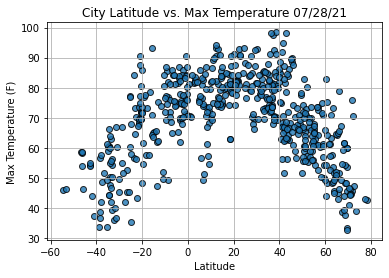

In [74]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

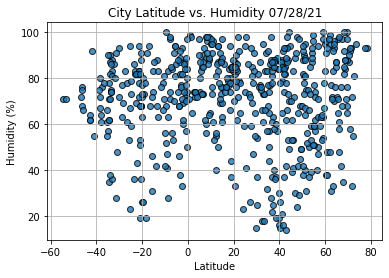

In [75]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

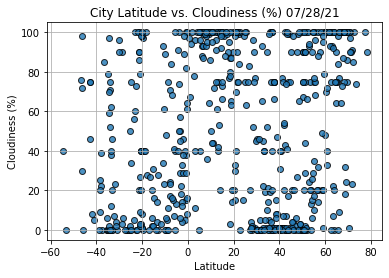

In [76]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

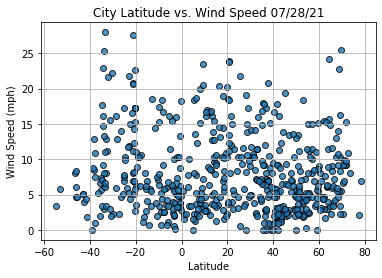

In [77]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [78]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
# Look at the 13th city in the df 
index13 = city_data_df.loc[13]
index13

City                     Victoria
Lat                       22.2855
Lng                      114.1577
Max Temp                    92.97
Humidity                       79
Cloudiness                     99
Wind Speed                    3.0
Country                        HK
Date          2021-07-29 03:14:08
Name: 13, dtype: object

In [80]:
# Use loc and true or false to display northern hemisphere cities >0 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,75.92,33,91,15.26,RU,2021-07-29 03:15:15
8,Longyearbyen,78.2186,15.6401,42.64,93,90,6.91,SJ,2021-07-29 03:15:19
10,Zomin,39.9606,68.3958,81.99,19,0,5.99,UZ,2021-07-29 03:15:19
11,Butaritari,3.0707,172.7902,82.71,72,11,10.07,KI,2021-07-29 03:15:20
12,Cabo San Lucas,22.8909,-109.9124,90.70,65,0,5.01,MX,2021-07-29 03:11:00


In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

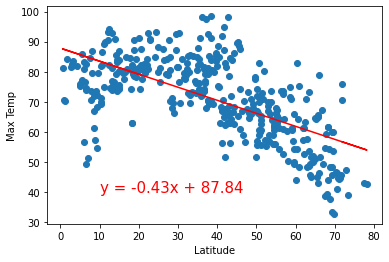

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


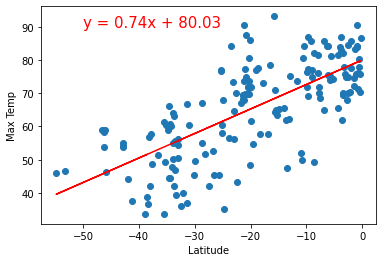

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

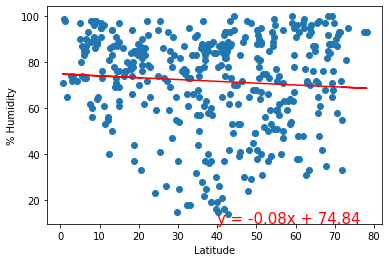

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

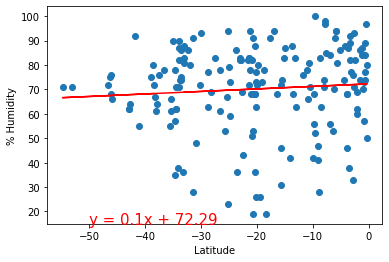

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

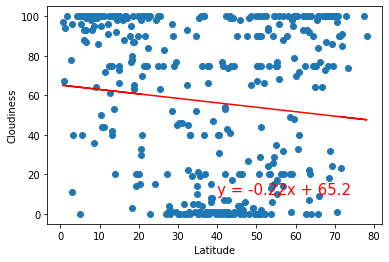

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

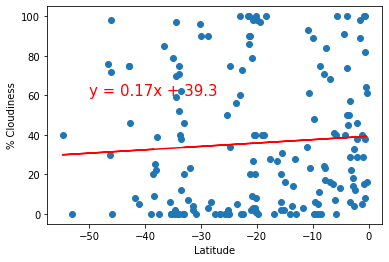

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

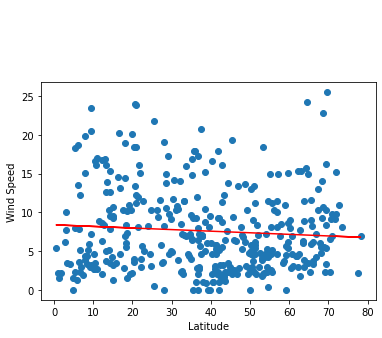

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

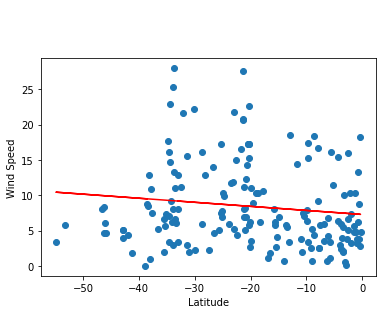

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))